DSCI004_02 Jinchuan Wang

Github link: https://github.com/Jmmchai/individual-planning-stage

<h2>(1) Data Description</h2>

The project uses two related datasets, players.csv and sessions.csv

players.csv: A list of all unique players, including data about each player.

sessions.csv: A list of individual play sessions by each player, including data about the session.

players.csv

Number of observations(rows): 196

Number of variables(columns): 7

| Variable Name | Type | Description |
| ------------- | ---- | ----------- |
| Experience | chr | Describing a player’s experience level |
| Subscribe | lgl | Player subscribed or not to the research server | 
| HashedEmail | chr | Representing an anonymized player ID |
| Played_hours | dbl | How many total hours the player has played |
| Name | chr | Player’s nickname in game |
| Gender | chr | Player's gender |
| Age | dbl | Player’s age in years |

sessions.csv

Number of observations(rows): 1535

Number of variables(columns): 5

| Variable Name | Type | Description |
| ------------- | ---- | ----------- |
| hashedEmail | chr | Representing an anonymized player ID |
| start_time | chr | Time when the session was created(human-readable) |
| end_time | chr | Time when the session was end(human-readable) |
| original_start_time | dbl | Unix timestamp (milliseconds) of session start |
| original_end_time | dbl | Unix timestamp (milliseconds) of session end |

Visible Issues: The categories of experience is undefined categorical scale. The data may contain self-reported bias.

Potential Issues: The categories of played_hours or age may contain missing value(NA) or extreme value. 

<h2>(2) Questions</h2>

broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

specific question: Can we predict whether a player subscribes to the newsletter (subscribe) based on their age, and total hours played in the players.csv dataset?

In my question, the target(Response variable) is subscribe, which return true or false, and the predictor are age and played_hours. 
The variable age represents each player’s age in years, which may influence their likelihood of subscribing due to different levels of interest or experience with research projects.
The variable played_hours measures how many total hours a player has spent in game, which reflects their engagement.

The players.csv dataset contains the response variable and the chosen predictors (age and played_hours). First we need to split the data to training dataset and testing dataset. Second we use step_scale() and step_center() to standardize numerical variables(age, played_hours), so that they are on the same scale. Finally, we build a classification model to predict the target variable subscribe based on two predictors.

<h2>(3) Exploratory Data Analysis and Visualization</h2>

<h3>Load data</h3>

In [2]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players_url <- "https://raw.githubusercontent.com/Jmmchai/individual-planning-stage/refs/heads/main/players.csv"
players <- read_csv(players_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
glimpse(players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [5]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

<h3>Wrangling</h3>

In [13]:
players_wrangling <- players |>
mutate(subscribe = as.factor(subscribe)) |>
filter(!is.na(Age), !is.na(played_hours))

<h4>Compute</h4>

In [14]:
players_means <- players_wrangling |>
summarise(mean_age = mean(Age), mean_hours = mean(played_hours))
players_means

mean_age,mean_hours
<dbl>,<dbl>
21.13918,5.904639


<h3>Visualization</h3>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


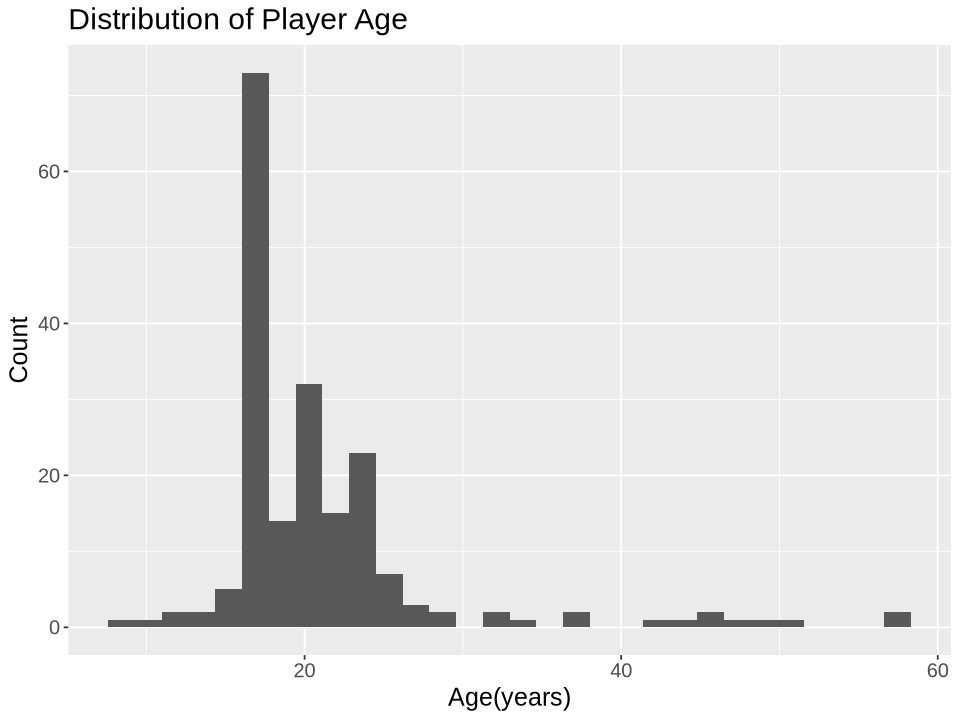

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
Age_distr <- ggplot(players_wrangling, aes(x = Age))+
geom_histogram()+
labs(title = "Distribution of Player Age", x = "Age(years)", y = "Count")+
theme(text = element_text(size = 15))
Age_distr

This histogram shows the distribution of Player ages. It can be seen in this chart that the ages of most players are concentrated between 15 and 30 years old, and the peak occurs between 17 and 22 years old. Very few people are over 30 years old. We can see that the players are mainly concentrated among the young group.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


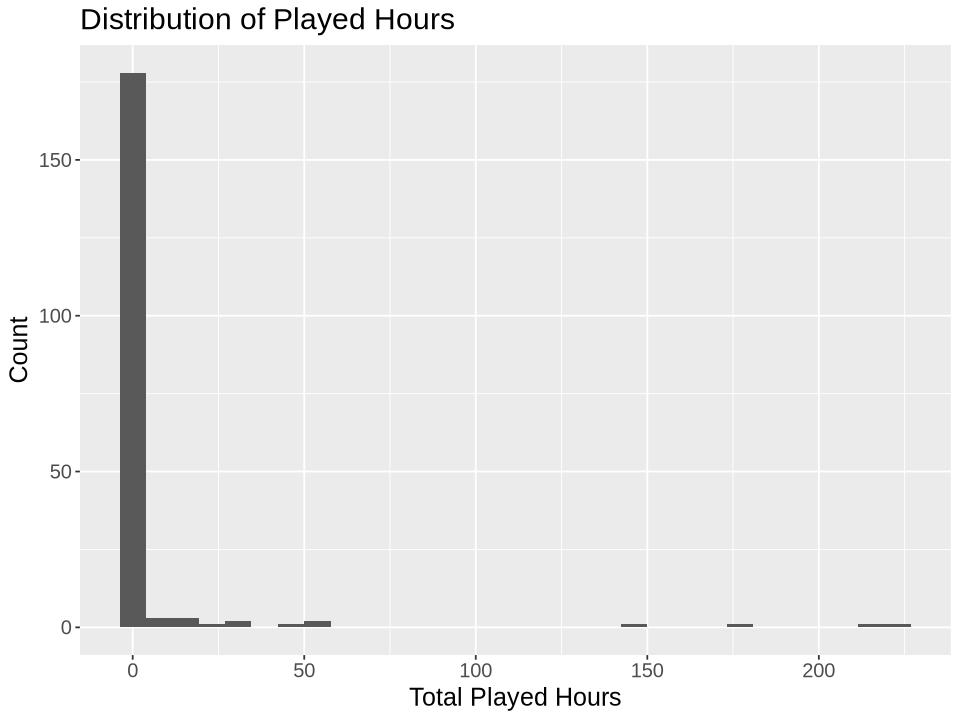

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)
Played_hours_distr <- ggplot(players_wrangling, aes(x = played_hours))+
geom_histogram()+
labs(title = "Distribution of Played Hours", x = "Total Played Hours", y = "Count")+
theme(text = element_text(size = 15))
Played_hours_distr

This histogram shows the distribution of Played Hours. We can see that most players only played very few hours(no more than 2 hours). There are also very few players who have spent extremely high playtime. 

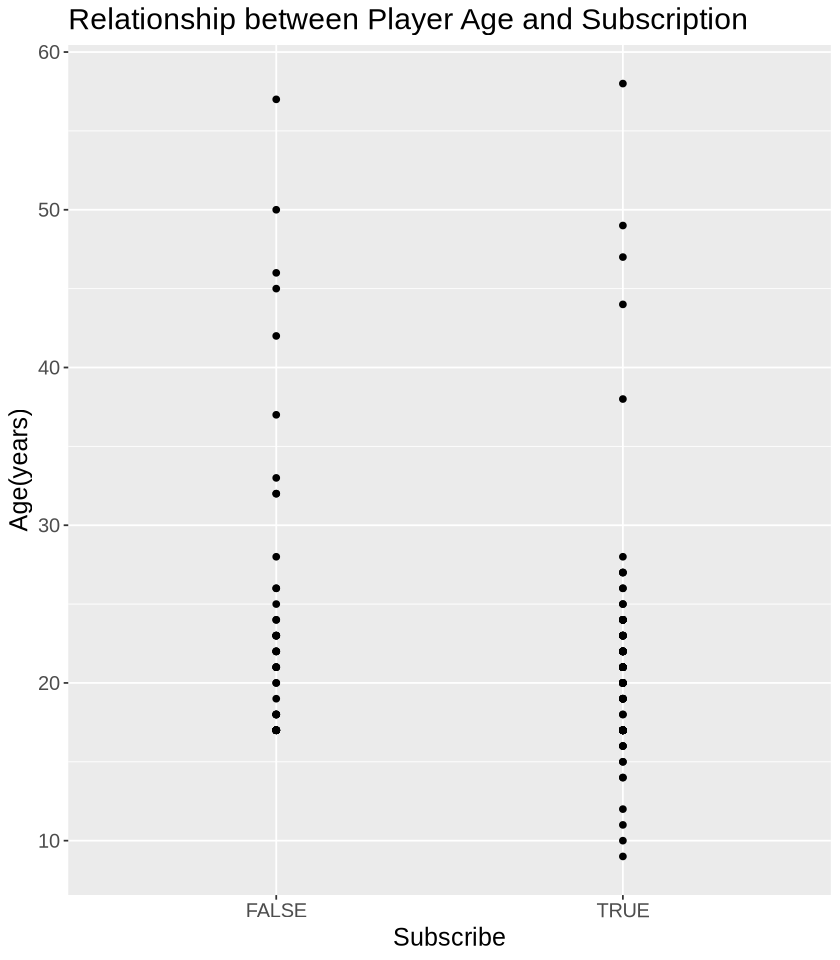

In [10]:
options(repr.plot.width = 7, repr.plot.height = 8)
Age_sub <- ggplot(players_wrangling, aes(x = subscribe, y = Age))+
geom_point()+
labs(title = "Relationship between Player Age and Subscription", x = "Subscribe", y = "Age(years)")+
theme(text = element_text(size = 15))
Age_sub

This scatter plot shows the relationship between Player Age and Subscription. Both subscribe and non-subscribe players appear across similar age ranges(subscription group is slightly younger). So Age does not seem to be a strong predictor of subscription status.

subscribe,mean_hours
<fct>,<dbl>
FALSE,0.5019231
TRUE,7.8830986


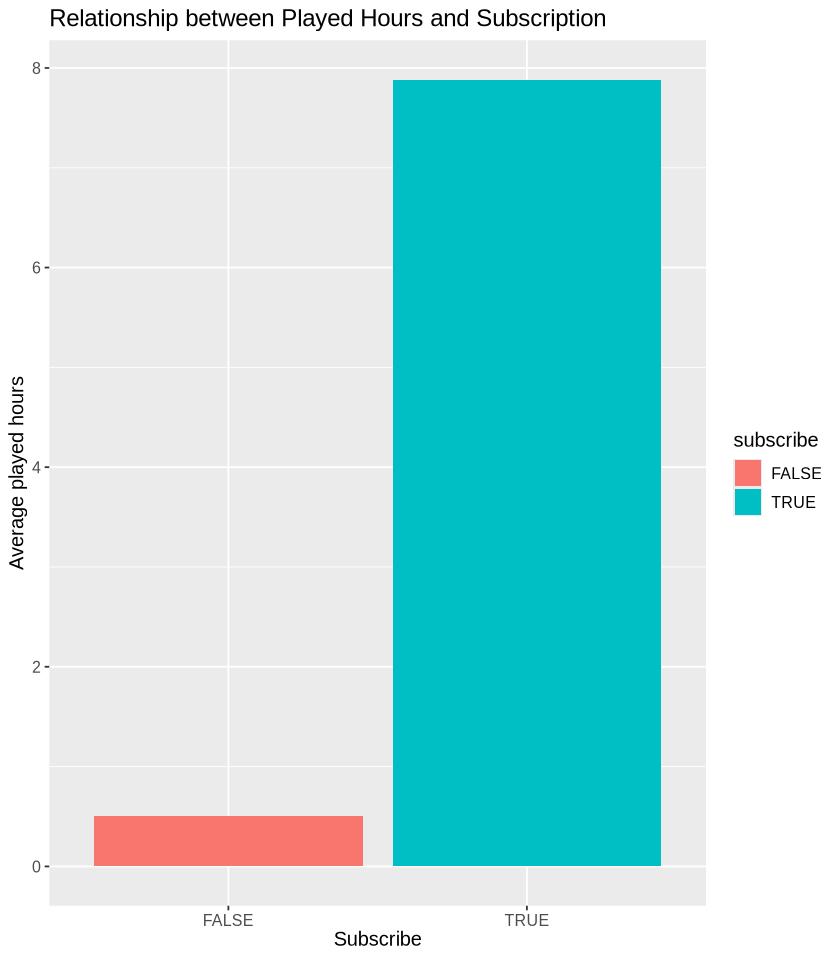

In [15]:
options(repr.plot.width = 7, repr.plot.height = 8)
avg_hours_by_sub <- players_wrangling |>
  group_by(subscribe) |>
  summarise(mean_hours = mean(played_hours))
avg_hours_by_sub

Hours_sub <- ggplot(avg_hours_by_sub, aes(x = subscribe, y = mean_hours, fill = subscribe))+
geom_col()+
labs(title = "Relationship between Played Hours and Subscription", x = "Subscribe", y = "Average played hours")+
theme(text = element_text(size = 12))
Hours_sub

This bar chart comparing Average Played Hours and Subscription, shows that subscribed players have higher average played hours(7.88 hours) than non-subscribed players(0.5 hours). So Average played hours seem to be a strong preditor of subscription status, because player who spend more time to play are much more likely to subscribe.

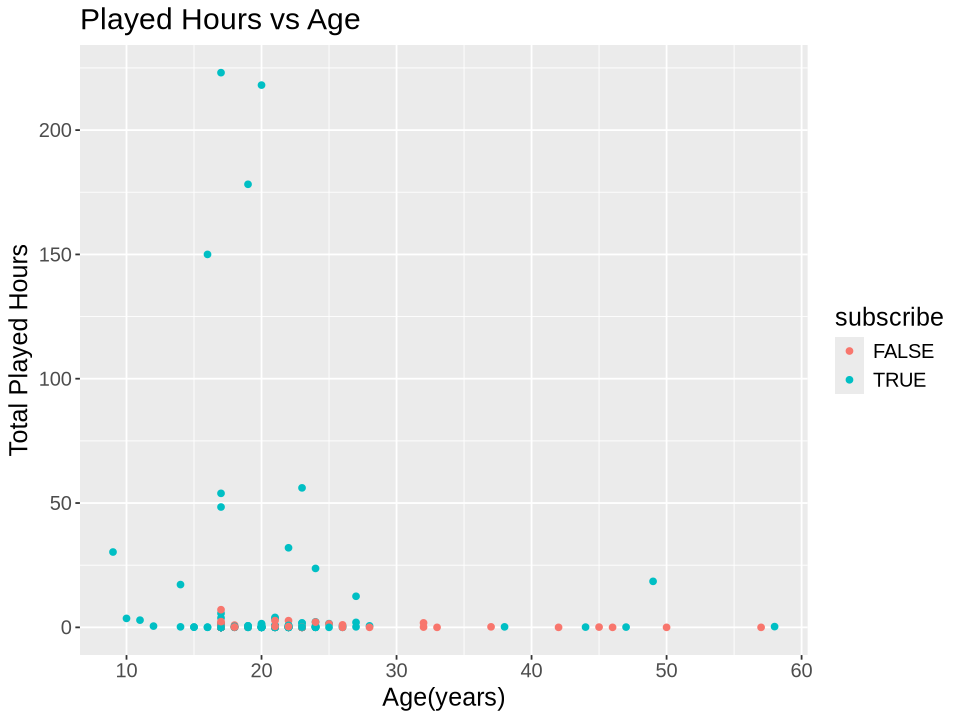

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6)
Hour_age_scatter <- ggplot(players_wrangling, aes(x = Age, y = played_hours, color = subscribe))+
geom_point()+
labs(title = "Played Hours vs Age", x = "Age(years)", y = "Total Played Hours")+
theme(text = element_text(size = 15))
Hour_age_scatter

This scatter plot shows that players with very high played hours tend to be younger, and most older players have lower total played hours and less likely to subscribe. Overall, we can see that younger and more active players(higher total played hours) are more likely to subscribe.

<h4>Conclusion</h4>

Played_hours shows a strong and clear relationship with Subscribe(more played hours, more likely to subscribe), and Age has few influence on subscripton status.

<h3>Methods and Plan</h3>

<h4>Proposed Method</h4>

I plan to use a K-Nearest Neighbors(KNN) classification model to predict whether a player subscribes to the newsletter (subscribe) based on two predictors: age and total hours played in the players.csv dataset. 

<h4>Reason for choosing this method</h4>

First, KNN does not assume any linear relationship between predictor and target variable. In addition, the target variable(response variable) is a logical variable(binary, only true or false), which is suitable to classification model. Also the predictors are numerical, KNN can directly measure similarity by using Euclidean distance. 

<h4>Assumption Required</h4>

The KNN relies on one key assumption. Observations that are close to each other in the predictor space (Age, Played_hours) are expected to have similar response values (Subscribe).

<h4>Potential Limitation</h4>

First, KNN is sensitive to scaling, which means variables with larger scales can bias the distance metric. Second, KNN is sensitive to extreme values. Finally, when the dataset increases in size, the computation will also become very large.

<h4>Compare Model</h4>

Since the response variable (subscribe) is categorical (True or False), we use a classification model. Therefore, during model comparison, we use cross-validation on the training data only. We evaluate model performance using the classification confusion matrix. We use accuracy to measure the overall proportion of correct predictions, and also use precision to measure how many of the players predicted as "subscribed" actually subscribed, and use recall to measure how many of the actual subscribed players were correctly identified (define subscribe = TRUE as the positive class).

<h4>Apply the Model</h4>

First, we need to split the data into training dataset and testing dataset. We use 75% training and 25% testing. This training dataset will be used to train the model, and the testing dataset will be held out for the final evaluation. Second, we need to standardize the predictor before training, so that they are on the same scale. Third, we use cross-validation to select the best number of neighbors. Finally, we use the selected k value on the full training dataset to train the model, and then evaluate it on the testing dataset to estimate the performance.